# Section 1 - Data import, summary, pre-processing and visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import skew

#Reads in data
data = pd.read_excel('clinical_dataset.xlsx')
print(np.size(data))
data

1270


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Status
0,52,26.543128,83,6.156439,1.352861,22.531863,8.832323,10.084147,416.257761,healthy
1,41,23.527236,74,4.835092,1.013678,15.552154,6.289545,7.482242,274.366161,healthy
2,40,23.278413,73,4.726075,0.985695,14.976300,6.079755,7.267574,262.659535,healthy
3,27,19.535749,63,3.086309,0.564775,6.314613,2.924216,4.038659,86.574756,healthy
4,32,20.839655,66,3.657587,0.711419,9.332254,4.023573,5.163580,147.920865,healthy
...,...,...,...,...,...,...,...,...,...,...
122,45,26.850000,92,3.330000,0.755688,54.680000,12.100000,10.960000,268.230000,cancerous
123,62,26.840000,100,4.530000,1.117400,12.450000,21.420000,7.320000,330.160000,cancerous
124,65,32.050000,97,5.730000,1.370998,61.480000,22.540000,10.330000,314.050000,cancerous
125,72,25.590000,82,2.820000,0.570392,24.960000,33.750000,3.270000,392.460000,cancerous


In [2]:
data_mat= data.to_numpy()
data_mat

array([[52, 26.5431276885291, 83, ..., 10.0841473646695,
        416.257761263498, 'healthy'],
       [41, 23.5272362946489, 74, ..., 7.48224205253197,
        274.366160510167, 'healthy'],
       [40, 23.2784131698069, 73, ..., 7.26757443829932,
        262.659534880372, 'healthy'],
       ...,
       [65, 32.05, 97, ..., 10.33, 314.05, 'cancerous'],
       [72, 25.59, 82, ..., 3.27, 392.46, 'cancerous'],
       [86, 27.18, 138, ..., 4.35, 90.09, 'cancerous']], dtype=object)

In [3]:
#Mean of each feature
Mean_vals = [np.mean(data['Age']),
np.mean(data['BMI']),
np.mean(data['Glucose']),
np.mean(data['Insulin']),
np.mean(data['HOMA']),
np.mean(data['Leptin']),
np.mean(data['Adiponectin']),
np.mean(data['Resistin']),
np.mean(data['MCP.1'])]

Mean_vals = np.round(Mean_vals, decimals=3)
Mean_vals

array([ 55.85 ,  27.216,  95.701,   9.557,   2.548,  25.622,   9.831,
        14.085, 511.389])

In [4]:
#Standard deviation of each feature
SD_vals = [np.std(data['Age']),
np.std(data['BMI']),
np.std(data['Glucose']),
np.std(data['Insulin']),
np.std(data['HOMA']),
np.std(data['Leptin']),
np.std(data['Adiponectin']),
np.std(data['Resistin']),
np.std(data['MCP.1'])]

SD_vals = np.round(SD_vals, decimals=3)
SD_vals

array([ 16.287,   4.989,  22.607,   9.7  ,   3.5  ,  18.631,   6.645,
        11.993, 339.849])

In [5]:
#Minimum of each feature
Min_vals = [np.amin(data['Age']),
np.amin(data['BMI']),
np.amin(data['Glucose']),
np.amin(data['Insulin']),
np.amin(data['HOMA']),
np.amin(data['Leptin']),
np.amin(data['Adiponectin']),
np.amin(data['Resistin']),
np.amin(data['MCP.1'])]

Min_vals = np.round(Min_vals, decimals=3)
Min_vals

array([24.   , 18.37 , 60.   ,  2.432,  0.467,  4.311,  1.656,  3.21 ,
       45.843])

In [6]:
#Maximum of each feature
Max_vals = [np.amax(data['Age']),
np.amax(data['BMI']),
np.amax(data['Glucose']),
np.amax(data['Insulin']),
np.amax(data['HOMA']),
np.amax(data['Leptin']),
np.amax(data['Adiponectin']),
np.amax(data['Resistin']),
np.amax(data['MCP.1'])]

Max_vals = np.round(Max_vals, decimals=3)
Max_vals

array([  89.   ,   38.579,  201.   ,   58.46 ,   25.05 ,   90.28 ,
         38.04 ,   82.1  , 1698.44 ])

In [7]:
#Median of each feature
Median_vals = [np.median(data['Age']),
np.median(data['BMI']),
np.median(data['Glucose']),
np.median(data['Insulin']),
np.median(data['HOMA']),
np.median(data['Leptin']),
np.median(data['Adiponectin']),
np.median(data['Resistin']),
np.median(data['MCP.1'])]

Median_vals = np.round(Median_vals, decimals=3)
Median_vals

array([ 53.   ,  27.1  ,  92.   ,   5.782,   1.341,  19.065,   8.237,
        10.345, 426.175])

In [8]:
#Mode of each feature
Mode_vals = [stats.mode(data['Age']),
stats.mode(data['BMI']),
stats.mode(data['Glucose']),
stats.mode(data['Insulin']),
stats.mode(data['HOMA']),
stats.mode(data['Leptin']),
stats.mode(data['Adiponectin']),
stats.mode(data['Resistin']),
stats.mode(data['MCP.1'])]

Mode_vals

[ModeResult(mode=array([45], dtype=int64), count=array([7])),
 ModeResult(mode=array([21.36752137]), count=array([2])),
 ModeResult(mode=array([92], dtype=int64), count=array([9])),
 ModeResult(mode=array([3.226]), count=array([2])),
 ModeResult(mode=array([0.46740867]), count=array([1])),
 ModeResult(mode=array([4.311]), count=array([1])),
 ModeResult(mode=array([2.19428]), count=array([2])),
 ModeResult(mode=array([3.21]), count=array([1])),
 ModeResult(mode=array([1698.44]), count=array([4]))]

[array([37., 24.]), array([72., 89.]), array([45., 34.]), array([68., 86.])]

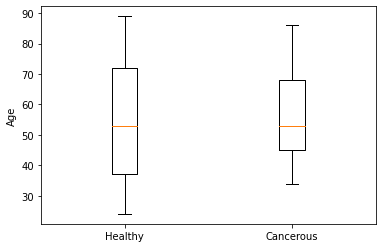

In [9]:
group = data.groupby(data.Status)
Healthy = group.get_group('healthy')
Cancerous = group.get_group('cancerous')
age_h = Healthy.Age
age_c = Cancerous.Age

Box = plt.boxplot([age_h,age_c])
plt.xticks([1, 2,], ['Healthy', 'Cancerous'])
plt.ylabel('Age')

plt.savefig('Boxplot(Age)')

[item.get_ydata() for item in Box['whiskers']]

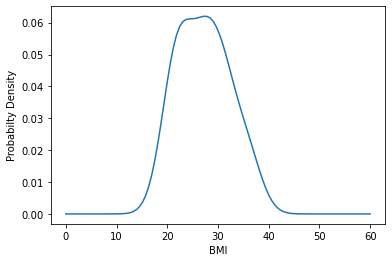

<Figure size 432x288 with 0 Axes>

In [16]:
density = gaussian_kde(data.BMI)
x_vals = np.linspace(0,60,100)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(x_vals,density(x_vals))
plt.xlabel('BMI')
plt.ylabel('Probabilty Density')
plt.show()
plt.savefig('Density_graph')

In [11]:
skew(data.BMI)

0.25667299705199786

# Section 3

In [12]:
#SKlearn imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#Initialises predictor feature
x_features = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
#Initialises predictors and targets
X = data[x_features]
y = data['Status'].replace({'healthy': 1, 'cancerous': 0})
#Splits data into 90% traning and 10% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)


In [13]:
from sklearn.metrics import accuracy_score
#Model network being fit to training data
clf = MLPClassifier(hidden_layer_sizes=500,activation='logistic', max_iter = 100)
clf.out_activation ='logistic'
clf.fit(x_train, y_train)
#Uses test predictors in trained model
pred = clf.predict(x_test)
#Accuracy test set
accuracy_score(y_test,pred)

C:\Users\Will\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7692307692307693

In [14]:
#Imports
from sklearn.ensemble import RandomForestClassifier
#Random forest model 
clf = RandomForestClassifier(n_estimators = 10000, min_samples_leaf = 50)
#Training data used to train the model
clf.fit(x_train, y_train)
#Predicts targets from model
pred = clf.predict(x_test)
#Accuracy test set
accuracy_score(y_test,pred)

0.5384615384615384

In [15]:
#Random forest model 
clf = RandomForestClassifier(n_estimators = 10000, min_samples_leaf = 5)
#Training data used to train the model
clf.fit(x_train, y_train)
#Predicts targets from model
clf.predict(x_test)
#Accuracy test set
accuracy_score(y_test,pred)

0.5384615384615384